In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [73]:
data_frame= pd.read_csv('Breast_Cancer_data.csv')

In [74]:
print(data_frame)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [75]:
# print the first 5 rows of the dataframe
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [76]:
data_frame.drop('Unnamed: 32', axis=1, inplace=True)

In [77]:
data_frame.drop('id', axis=1, inplace=True)

In [78]:
# Required columns list
required_columns = ['area_worst','concave points_worst','concave points_mean','radius_worst','perimeter_worst','perimeter_mean','concavity_mean','area_mean','concavity_worst','radius_mean','diagnosis']

# Drop all other columns except the required ones (inplace=True)
data_frame.drop(columns=[col for col in data_frame.columns if col not in required_columns], inplace=True)


In [79]:
data_frame.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,M,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654
1,M,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860
2,M,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430
3,M,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575
4,M,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625


In [80]:
# print last 5 rows of the dataframe
data_frame.tail()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
564,M,21.56,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.4107,0.2216
565,M,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.3215,0.1628
566,M,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.3403,0.1418
567,M,20.60,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.9387,0.2650
568,B,7.76,47.92,181.0,0.00000,0.00000,9.456,59.16,268.6,0.0000,0.0000


In [81]:
# number of rows and columns in the dataset
data_frame.shape

(569, 11)

In [82]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             569 non-null    object 
 1   radius_mean           569 non-null    float64
 2   perimeter_mean        569 non-null    float64
 3   area_mean             569 non-null    float64
 4   concavity_mean        569 non-null    float64
 5   concave points_mean   569 non-null    float64
 6   radius_worst          569 non-null    float64
 7   perimeter_worst       569 non-null    float64
 8   area_worst            569 non-null    float64
 9   concavity_worst       569 non-null    float64
 10  concave points_worst  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [83]:
# checking for missing values
data_frame.isnull().sum()

diagnosis               0
radius_mean             0
perimeter_mean          0
area_mean               0
concavity_mean          0
concave points_mean     0
radius_worst            0
perimeter_worst         0
area_worst              0
concavity_worst         0
concave points_worst    0
dtype: int64

In [84]:
# statistical measures about the data
data_frame.describe()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,91.969033,654.889104,0.088799,0.048919,16.269190,107.261213,880.583128,0.272188,0.114606
std,3.524049,24.298981,351.914129,0.079720,0.038803,4.833242,33.602542,569.356993,0.208624,0.065732
min,6.981000,43.790000,143.500000,0.000000,0.000000,7.930000,50.410000,185.200000,0.000000,0.000000
25%,11.700000,75.170000,420.300000,0.029560,0.020310,13.010000,84.110000,515.300000,0.114500,0.064930
50%,13.370000,86.240000,551.100000,0.061540,0.033500,14.970000,97.660000,686.500000,0.226700,0.099930
75%,15.780000,104.100000,782.700000,0.130700,0.074000,18.790000,125.400000,1084.000000,0.382900,0.161400
max,28.110000,188.500000,2501.000000,0.426800,0.201200,36.040000,251.200000,4254.000000,1.252000,0.291000


In [85]:
# checking the distribution of Target Varibale
data_frame['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [86]:
data_frame.loc[data_frame['diagnosis'] == 'B', 'diagnosis'] = 1
data_frame.loc[data_frame['diagnosis'] == 'M', 'diagnosis'] = 0

In [87]:
data_frame.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654
1,0,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860
2,0,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430
3,0,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575
4,0,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625


In [88]:
# checking the distribution of Target Varibale
data_frame['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [89]:
# 1-->Bengin
# 0-->Malignant

In [90]:
data_frame.groupby('diagnosis').mean()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
diagnosis,,,,,,,,,,
0,17.462830,115.365377,978.376415,0.160775,0.087990,21.134811,141.370330,1422.286321,0.450606,0.182237
1,12.146524,78.075406,462.790196,0.046058,0.025717,13.379801,87.005938,558.899440,0.166238,0.074444


In [91]:
#Separating the features and target
X = data_frame.drop(columns='diagnosis', axis=1)
Y = data_frame['diagnosis']

In [92]:
print(X)

     radius_mean  perimeter_mean  area_mean  concavity_mean  \
0          17.99          122.80     1001.0         0.30010   
1          20.57          132.90     1326.0         0.08690   
2          19.69          130.00     1203.0         0.19740   
3          11.42           77.58      386.1         0.24140   
4          20.29          135.10     1297.0         0.19800   
..           ...             ...        ...             ...   
564        21.56          142.00     1479.0         0.24390   
565        20.13          131.20     1261.0         0.14400   
566        16.60          108.30      858.1         0.09251   
567        20.60          140.10     1265.0         0.35140   
568         7.76           47.92      181.0         0.00000   

     concave points_mean  radius_worst  perimeter_worst  area_worst  \
0                0.14710        25.380           184.60      2019.0   
1                0.07017        24.990           158.80      1956.0   
2                0.12790      

In [93]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: object


In [94]:
# Splitting the data into training data & Testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [95]:
print(X.shape, X_train.shape, X_test.shape)

(569, 10) (455, 10) (114, 10)


In [96]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [98]:
print(X_train_std.dtype)
print(Y_train.dtype)

float64
object


In [99]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train)

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train)


In [101]:
Y_test_encoded = le.transform(Y_test)

In [102]:
np.unique(Y_train, return_counts=True)

(array([0, 1], dtype=object), array([167, 288], dtype=int64))

In [103]:
# Building the Neural Network

In [104]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [105]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(10,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

C:\Users\nitis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [106]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [107]:
# training the Neural Network

history = model.fit(X_train_std, Y_train_encoded, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6450 - loss: 0.9099 - val_accuracy: 0.6522 - val_loss: 0.6914
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6450 - loss: 0.7205 - val_accuracy: 0.6522 - val_loss: 0.5514
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6502 - loss: 0.5702 - val_accuracy: 0.6739 - val_loss: 0.4414
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6623 - loss: 0.4519 - val_accuracy: 0.7174 - val_loss: 0.3549
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7675 - loss: 0.3601 - val_accuracy: 0.8696 - val_loss: 0.2884
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8907 - loss: 0.2926 - val_accuracy: 0.9348 - val_loss: 0.2404
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9200 - loss: 0.2453 - val_accuracy: 0.9565 - val_loss: 0.2046
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9311 - loss: 0.2120 - val_accuracy: 0.9565 - v

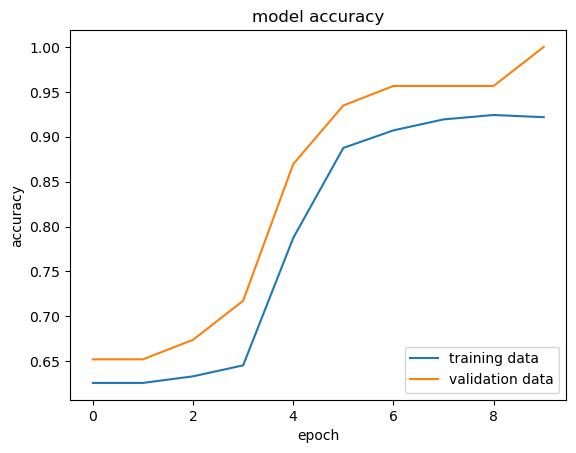

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

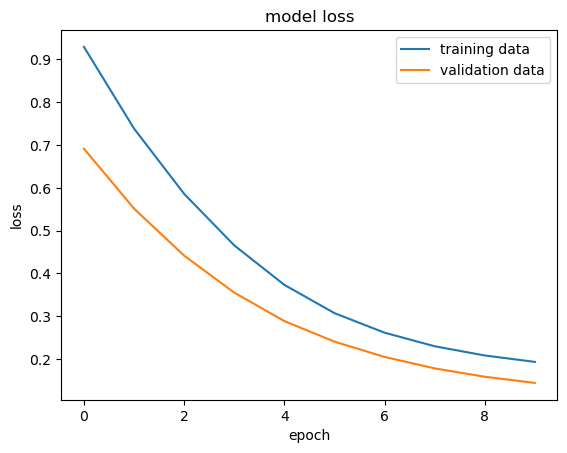

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [110]:
# Accuracy of the model on test data

In [111]:
loss, accuracy = model.evaluate(X_test_std, Y_test_encoded)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8881 - loss: 0.2016
0.8947368264198303


In [112]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 10)
[-0.04462793 -0.05903514 -0.16234067  0.18500609  0.47102419 -0.32983699
 -0.36854552 -0.38767294 -0.54689089 -0.18278004]


In [113]:
Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [114]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.33676875 0.7400433 ]


In [115]:
print(X_test_std)

[[-0.04462793 -0.05903514 -0.16234067 ... -0.38767294 -0.54689089
  -0.18278004]
 [ 0.24583601  0.21802678  0.10121824 ... -0.10539076 -0.42866144
   0.54129749]
 [-1.26115925 -1.26499659 -1.03398179 ... -0.88026887 -0.98993767
  -1.35138617]
 ...
 [ 0.72709489  0.75277276  0.71637776 ...  2.42919657  0.9664461
   1.46701686]
 [ 0.25437907  0.15659489  0.13377386 ... -0.30560368 -1.18349617
  -1.29043534]
 [ 0.84100232  0.8929529   0.68920091 ...  0.57857986  1.12231594
   2.15137705]]


In [116]:
print(Y_pred)

[[0.33676875 0.7400433 ]
 [0.46633548 0.6185117 ]
 [0.11368809 0.9892956 ]
 [0.89268434 0.0756515 ]
 [0.5479456  0.44224113]
 [0.8002327  0.22175725]
 [0.24111459 0.9010561 ]
 [0.28873068 0.96333957]
 [0.24052043 0.9219848 ]
 [0.3960911  0.82587326]
 [0.5520172  0.5700315 ]
 [0.22203355 0.89968944]
 [0.14822246 0.9525817 ]
 [0.25988555 0.9087223 ]
 [0.18414631 0.96631986]
 [0.7728591  0.30515313]
 [0.16387849 0.96341014]
 [0.1781266  0.94121385]
 [0.19037735 0.9652439 ]
 [0.71763825 0.24936064]
 [0.1964007  0.4784343 ]
 [0.19261234 0.9627868 ]
 [0.2949153  0.8864973 ]
 [0.22525646 0.9625889 ]
 [0.4254396  0.71685255]
 [0.81083876 0.24418394]
 [0.3721904  0.8681994 ]
 [0.5340147  0.5326439 ]
 [0.82770467 0.29832202]
 [0.8240139  0.29257026]
 [0.57184017 0.49221602]
 [0.25337717 0.91163856]
 [0.28920427 0.899098  ]
 [0.8219377  0.25250813]
 [0.8040339  0.18143237]
 [0.272865   0.81720996]
 [0.2636602  0.9706919 ]
 [0.4042788  0.80231196]
 [0.10857191 0.9851194 ]
 [0.12011329 0.9582481 ]


In [117]:
# model.predict() gives the prediction probability of each class for that data point

In [118]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [119]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


In [120]:
# Building the predictive system

In [121]:
#input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)
input_data = (7.76,	47.92,	181.0	,0.00000,	0.00000,	9.456,	59.16,	268.6,	0.0000	,0.0000)
# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[0.06279164 0.9969132 ]]
[1]
The tumor is Benign


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [199]:
# save the model
model.save("Breast_Cancer_Model.keras")

In [51]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [62]:
print(scaler.mean_)

[1.40967165e+01 9.17418681e+01 6.51545495e+02 8.66998455e-02
 4.79859363e-02 1.61836747e+01 1.06662000e+02 8.68229670e+02
 2.69229011e-01 1.13465257e-01]


In [71]:
data_frame.to_csv('Cleaned_Brest_Cancer_data.csv')